# 说明
分水岭算法是基于绝对灰度的，对于这种图像没有丝毫用处

In [1]:
import cv2
import copy
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show(title, img):
    plt.plot(1, 1, 1)
    plt.title(title)
    plt.imshow(img, cmap="gray")
    plt.show()


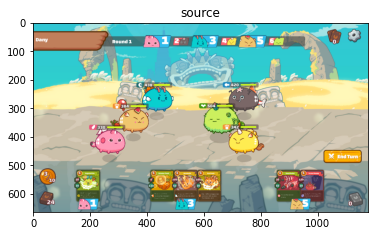

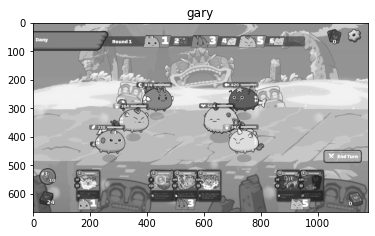

In [11]:
img_battle = cv2.cvtColor(cv2.imread("axie_some/images/20211025-160926.png"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_battle, cv2.COLOR_RGB2GRAY)

show("source", img_battle)
show("gary", gray)

当前框选区域为: 
(122, 202, 886, 282)


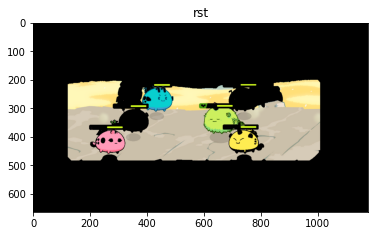

In [12]:
img_show_rect = copy.deepcopy(img_battle)
exit_key = ord('q')

rect = cv2.selectROI("input", img_show_rect, False)
mask = np.zeros(img_battle.shape[:2], np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)


print(f"当前框选区域为: \n{rect}")
cv2.destroyAllWindows()

# 函数的返回值是更新的 mask, bgdModel, fgdModel
cv2.grabCut(img_battle, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img_battle*mask2[:,:,np.newaxis]

show("rst", img)

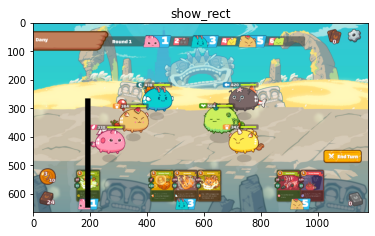

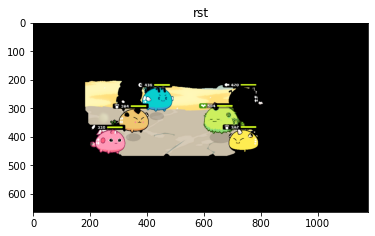

In [7]:
import copy

mask = np.zeros(img_battle.shape[:2], np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (183, 201, 648, 267)

cv2.rectangle(img_show_rect, (rect[0], rect[-1]), (rect[1], rect[-2]), 0, -1)
show("show_rect", img_show_rect)

# 函数的返回值是更新的 mask, bgdModel, fgdModel
cv2.grabCut(img_battle, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img_battle*mask2[:,:,np.newaxis]

show("rst", img)